/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Jumlah cluster terbentuk : 2
Banyaknya noise          : 0


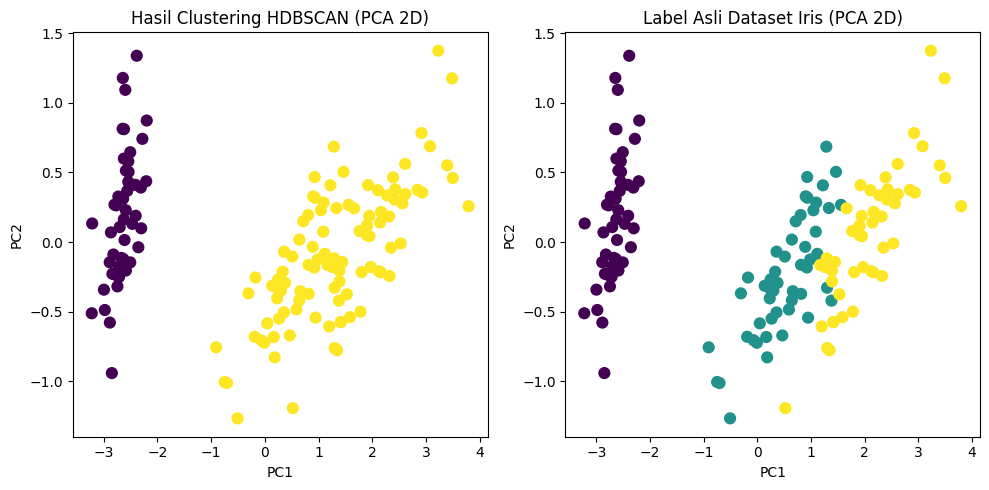

Adjusted Rand Index (ARI): 0.568

Analisis: Hasil clustering HDBSCAN cukup sesuai dengan label asli.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import hdbscan
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

data = load_iris()
X = data.data
y_true = data.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
cluster_labels = clusterer.fit_predict(X)

n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Jumlah cluster terbentuk : {n_clusters}")
print(f"Banyaknya noise          : {n_noise}")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=60)
plt.title("Hasil Clustering HDBSCAN (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', s=60)
plt.title("Label Asli Dataset Iris (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()

from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y_true, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

if ari > 0.5:
    print("\nAnalisis: Hasil clustering HDBSCAN cukup sesuai dengan label asli.")
else:
    print("\nAnalisis: Hasil clustering HDBSCAN tidak sepenuhnya sesuai dengan label asli.")
